****Project Title : Predicting no of bike will be rent on particular date**
**This project is aimed to be predicting the no of  bike will be rented on date with comparing al necessary parameters and analyze the custumer requirement** 

**This is problem of supervised learning continous data as predicting no of bikes will be rented on date so we use regression algorithum and linear regression,polynomial regression,rand forest regression and xgboost with hyperparametertunning and compare all of them for better result**

**In regression model we use r2 score, mean squared error , and root mean squared error matrix for evaluate and performance of the model**

## Column information of dataset

* **Date-date on which no of bikes rented (year,month,date)
* **Rented Bike Count-No of bikes rented (Dependant variable)
* **Hour- For how many hours bike rented
* **Temparature-The temparture on particular day when bike rented
* **Humidity%- The humidity on particullar day when bike rented
* **Windspeed m/s-wind speed o day when bike rented
* **Visibility (10m)-visibilty of 10 m distance when bike rented in that parcticular area
* **Dew point temprature - Dew pint temprature when bike rented
* **Solar radiation(MJ/M2)- Solar radiation on area when bike rented
* ** Snowfall(cm)- Snow fall if there in that area occures 
* **rainfall(mm) - rainfall on that particular day when bike rented
* **season- no bikes rented in diffrent seasons-following parameter contaning

-winter,
-spring=the season after winter 
-summer,
-autumn=The season after summer 
* **Holiday- wheather particular day is holiday or not
 
-holiday= there is holiday

-not holiday= there is not holiday
* ** functioning day- wheather parcticular day is functioning  or working day 
- yes = for working
- no = for not working

In [1401]:
# Import all necessary libaries 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from datetime import datetime,datetime


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1402]:
#Import dataset rentbike.
bike=pd.read_csv(r'H:\IT FOLDER\MACHINELEARINING\project\Bike.csv')

In [1403]:
#Read dataset pf 5 five rows
bike.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Dependant Variable is Rented bike count**

In [1404]:
bike['Rented Bike Count'].value_counts()

Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

In [1405]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

*  **Dataset is null free**
*  **follwing can understand date column is object datatype so its should change into datettype**
* **Total rows are 8760**
* **Float64 are 6 column , int64 are 4 column and object datatype are 4 column**

In [1406]:
# change date column into datetype
bike['Date']=bike['Date'].apply(lambda x:datetime.strptime(x,'%d/%m/%Y'))


In [1407]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [1408]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [1409]:
# Decribe the numerical data
bike.describe()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


**maximum bike rented for 23 hr means 1 day almost**
**full and with temprature around 39.40 means in sunny wheather condition and humidity highest is 98**
**wind speed min is 0 calm and max is 7.40 moderate conditin**
**visibility max 2000 and min 27**
**rainfall maximum 35 mm and min 0 mm**
**snowfall is 8.8 cm and min 0**

In [1410]:
bike.describe(include='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


* **spring season has highest frequency with on no holiday means on almost working day condition**

In [1411]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Feature Engineering on date column as cannot pass datetype into model

In [1412]:
#we will extract year and month column from date format
bike['year_month'] = bike['Date'].dt.strftime('%Y%m').astype(int)

In [1413]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [1414]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year_month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,201712
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,201712
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,201712
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,201712
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,201712


In [1415]:
#Drop original date column
bike.drop('Date',axis=1,inplace=True)

**highest season count is spring and no holiday means working day**

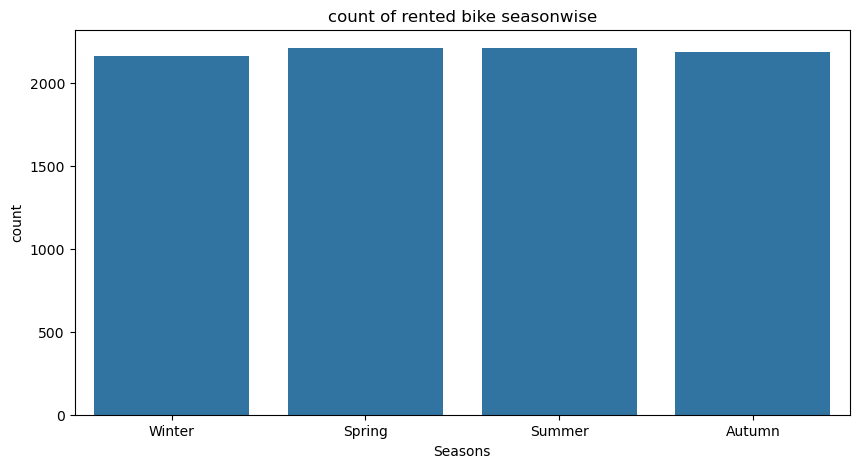

In [1416]:
#check relation categorical variabe with dependant variable 
plt.figure(figsize=(10,5))
sns.countplot(x='Seasons',data=bike)
plt.title('count of rented bike seasonwise')
plt.show()

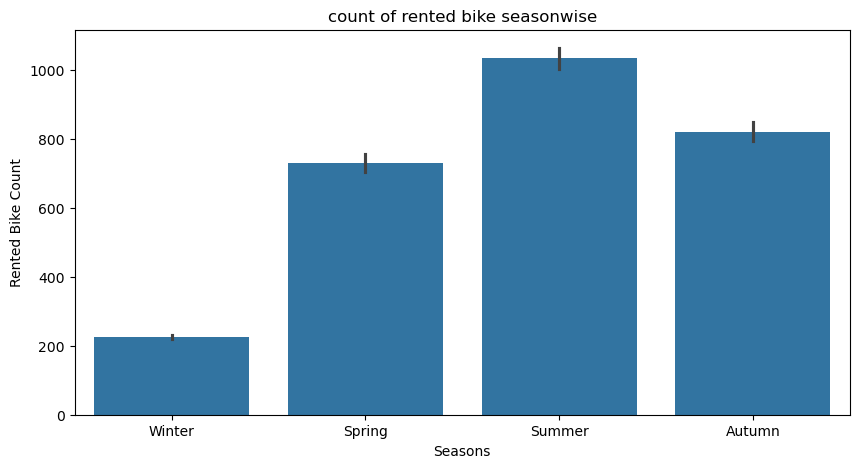

In [1417]:
plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=bike)
plt.title('count of rented bike seasonwise')
plt.show()

**in summer season highest bike are rented out**

In [1282]:
#from above chart on everyseason bike rented no direct effect of seasonwise

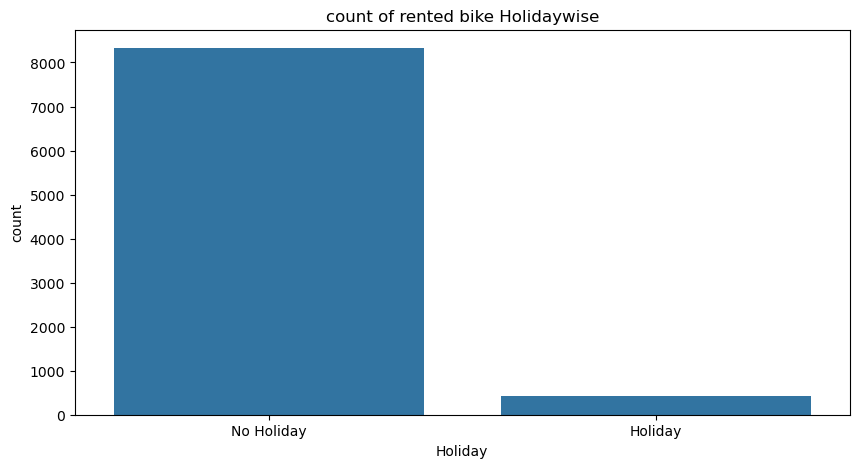

In [1418]:
plt.figure(figsize=(10,5))
sns.countplot(x='Holiday',data=bike)
plt.title('count of rented bike Holidaywise')
plt.show()

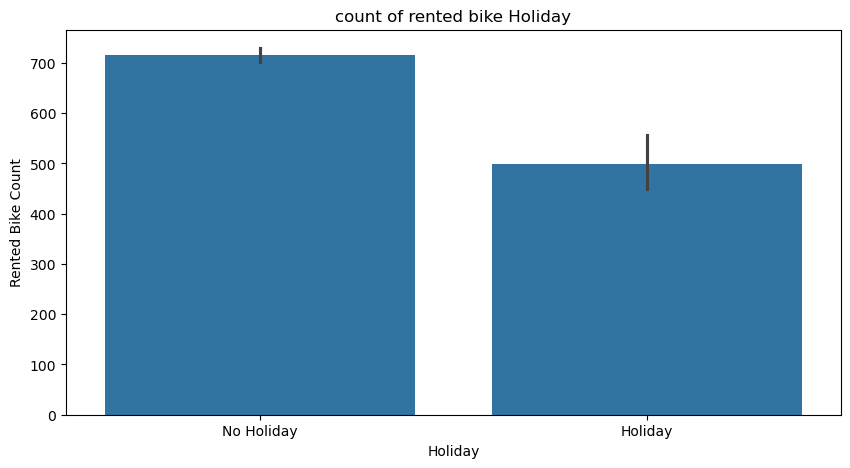

In [1419]:
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=bike)
plt.title('count of rented bike Holiday')
plt.show()

In [1420]:
bike[bike['Holiday']=='No Holiday'].value_counts()

Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday     Functioning Day  year_month
0                  0      8.8            63           0.6               1314               2.1                      0.00                     0.0           0.0            Autumn   No Holiday  No               201811        1
880                0      17.0           51           1.5               2000               6.7                      0.00                     0.0           0.0            Autumn   No Holiday  Yes              201809        1
878                14     21.1           42           4.3               2000               7.6                      2.49                     0.0           0.0            Spring   No Holiday  Yes              201803        1
                   10     26.4           55           0.9               901                16.6              

In [1368]:
8328/8760*100

95.06849315068493

**on no holiday 95% people are using rented bike means for working condition and this data prove below functionig data charat**

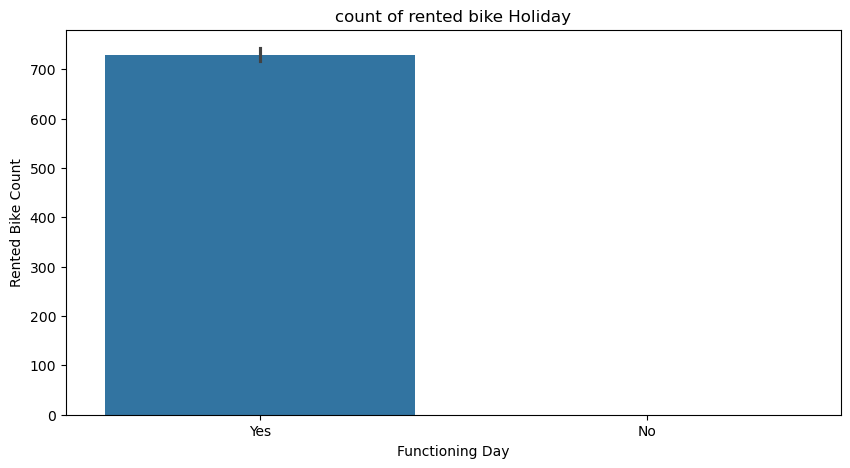

In [1421]:
plt.figure(figsize=(10,5))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bike)
plt.title('count of rented bike Holiday')
plt.show()

In [1422]:
bike[bike['Functioning Day']=='Yes'].value_counts()

Rented Bike Count  Hour  Temperature(蚓)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(蚓)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday     Functioning Day  year_month
2                  3     5.7             92           2.0               458                4.4                      0.00                     1.5           0.0            Spring   No Holiday  Yes              201803        1
892                9     29.0            64           0.8               1987               21.4                     1.45                     0.0           0.0            Summer   No Holiday  Yes              201808        1
899                10    17.0            37           1.4               2000               2.1                      0.94                     0.0           0.0            Spring   No Holiday  Yes              201805        1
898                20    19.1            77           2.2               1834               14.9              

In [1289]:
8465/8760*100

96.6324200913242

**above data can clearly see people are using rented bike on functioning day is almost 97% thats shows uses for working almost can say**

In [1423]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

## compared independnat column with dependant column

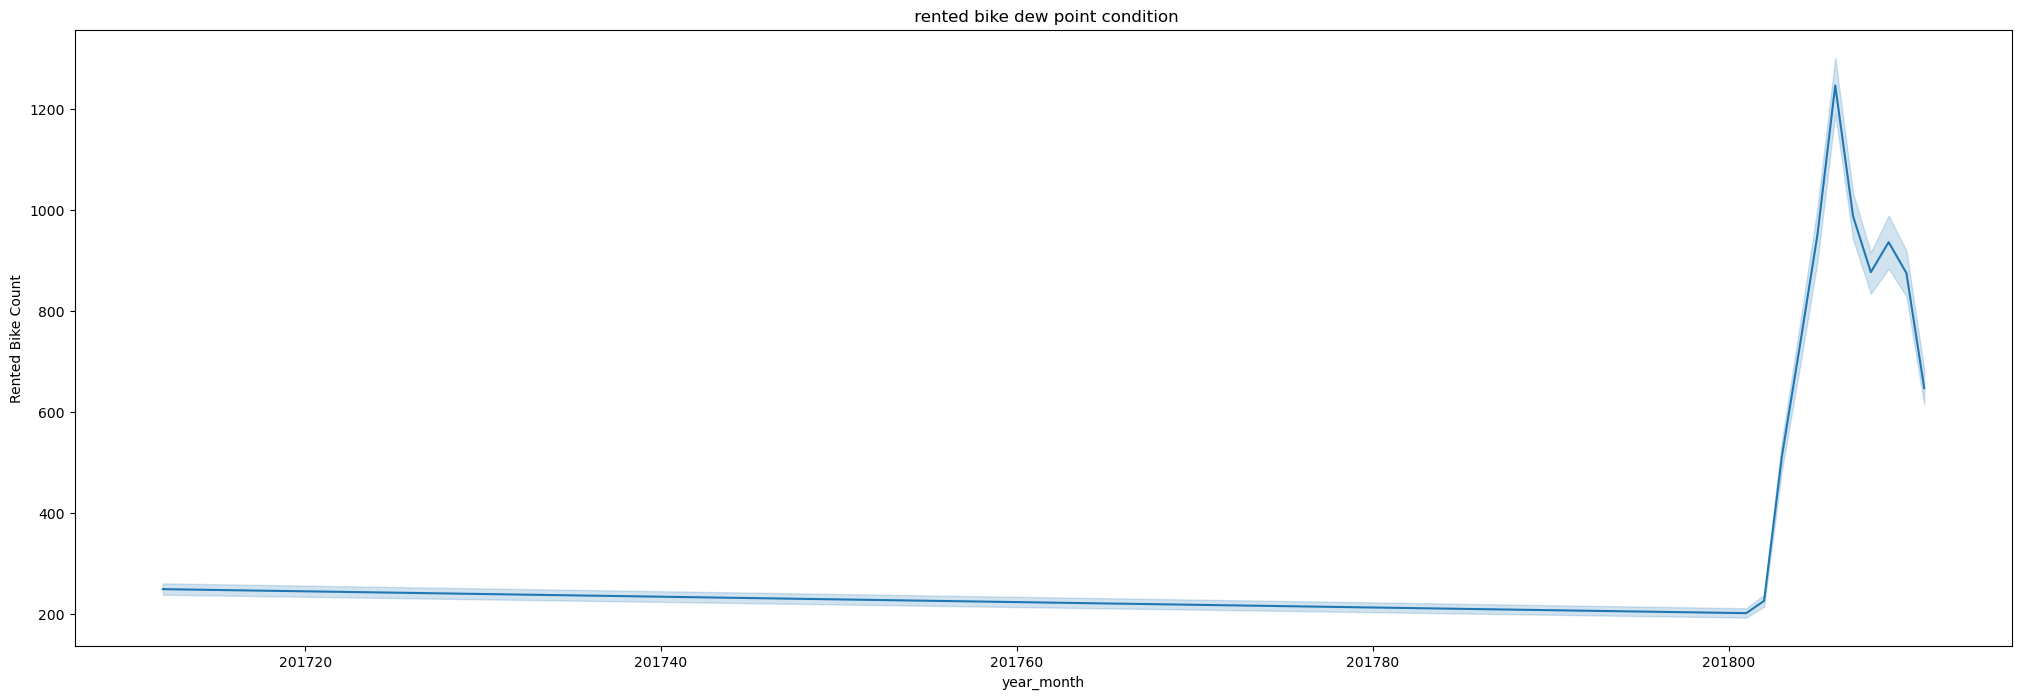

In [1425]:
plt.figure(figsize=(25,8))
sns.lineplot(x='year_month',y='Rented Bike Count',data=bike)
plt.title(' rented bike dew point condition')
plt.show()

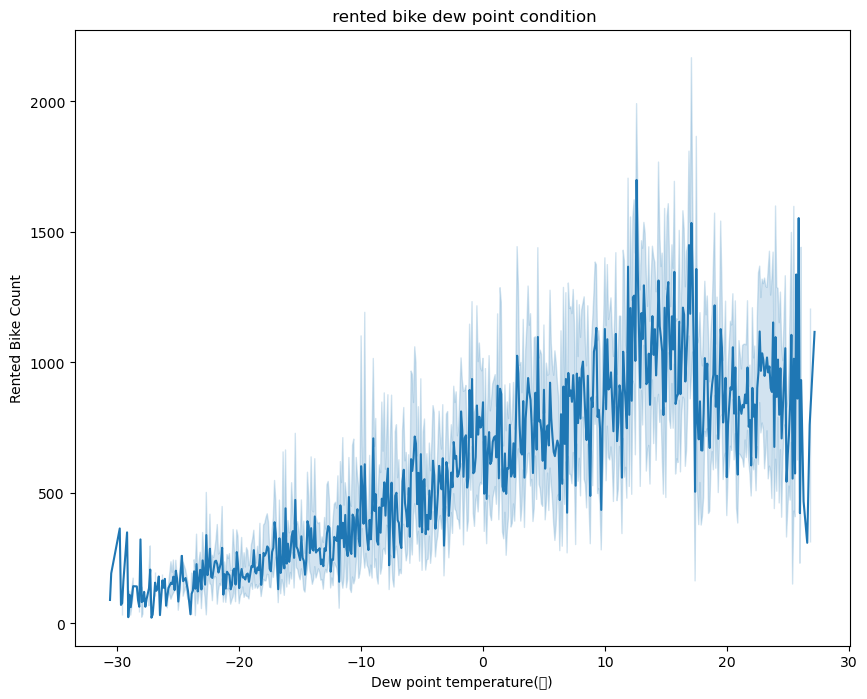

In [1426]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Dew point temperature(蚓)',y='Rented Bike Count',data=bike)
plt.title(' rented bike dew point condition')
plt.show()

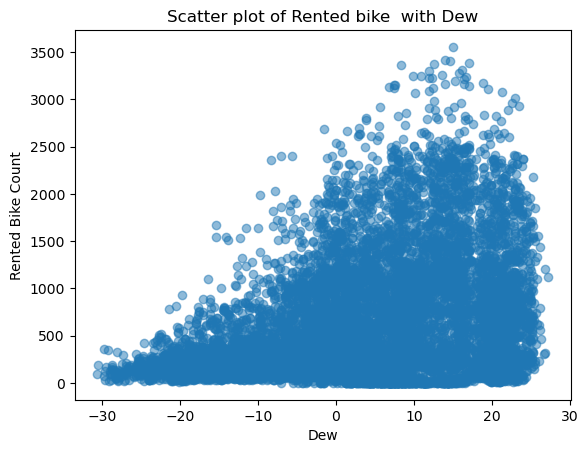

In [1427]:
plt.scatter(bike['Dew point temperature(蚓)'],bike['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike  with Dew')
plt.xlabel('Dew')
plt.ylabel('Rented Bike Count')
plt.show()

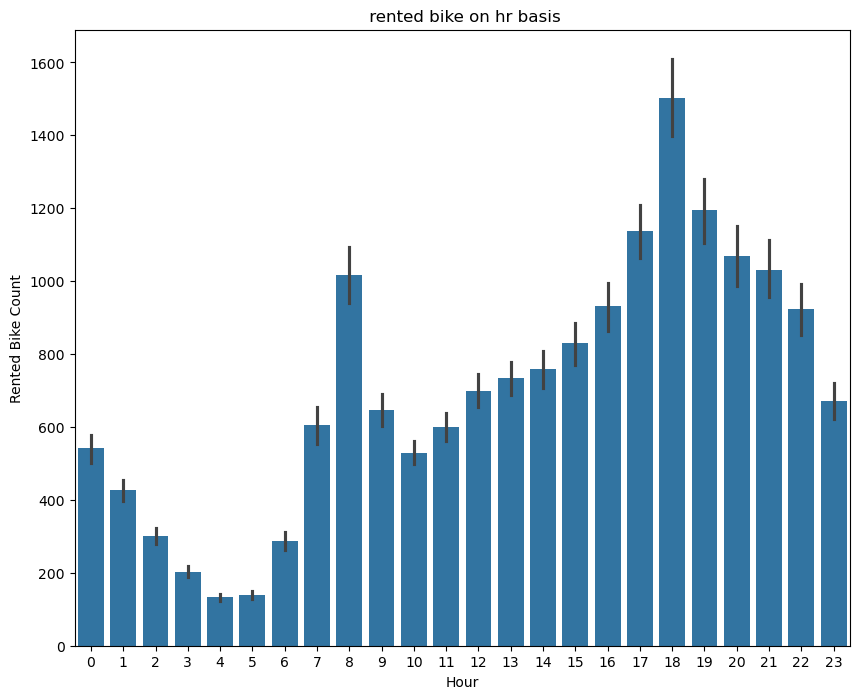

In [1428]:
plt.figure(figsize=(10,8))
sns.barplot(x='Hour',y='Rented Bike Count',data=bike)
plt.title(' rented bike on hr basis')
plt.show()

**for 18 hr has highest no of bikes rented and 17-20,8 has constant hr has frequent booking**

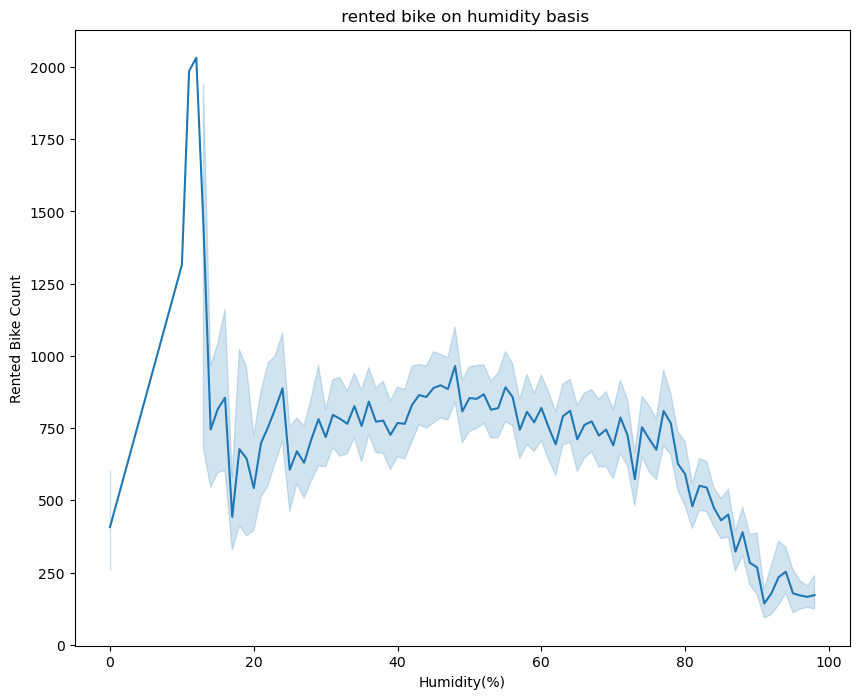

In [1429]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Humidity(%)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on humidity basis')
plt.show()

**as humidity 0-16 there is highest bike rented then suddenly dropped of rented bike and as humidity 20-50 rented bike silghtly constant 900-600 and as humidity above 60 dropped of users**

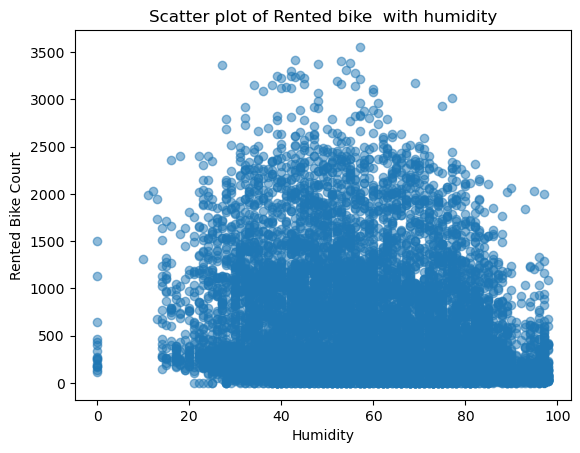

In [1430]:
plt.scatter(bike['Humidity(%)'],bike['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of Rented bike  with humidity')
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')
plt.show()

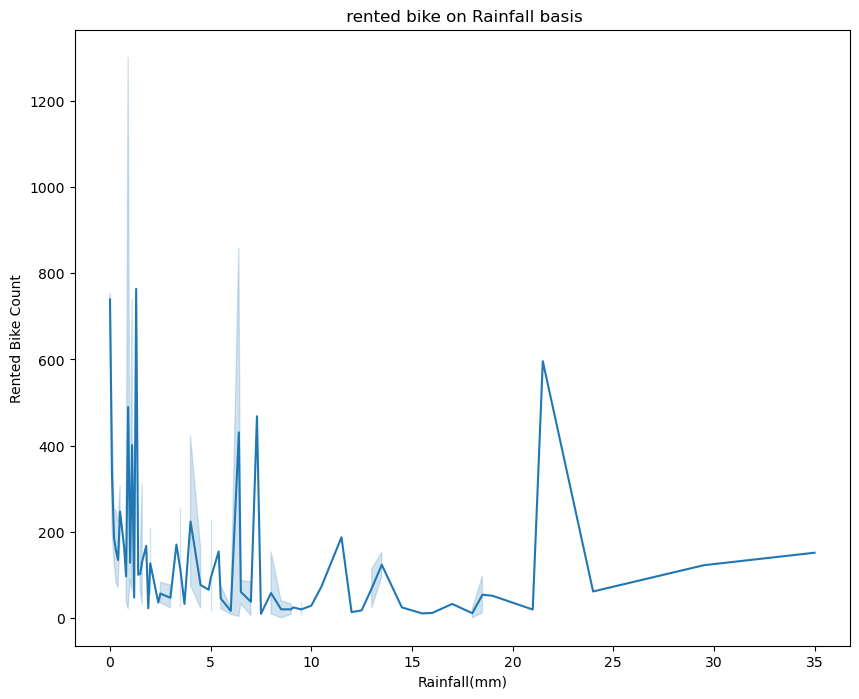

In [1431]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on Rainfall basis')
plt.show()

**highest bike rented at 1-2mm rainfall then 6 mm rainfall and between 3-5 there is sudden drop and 7-20 sudden drop then 21mm again sudden increase and then sudden drop as rainfall increases50 24 then sligthtly increases**

In [1297]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

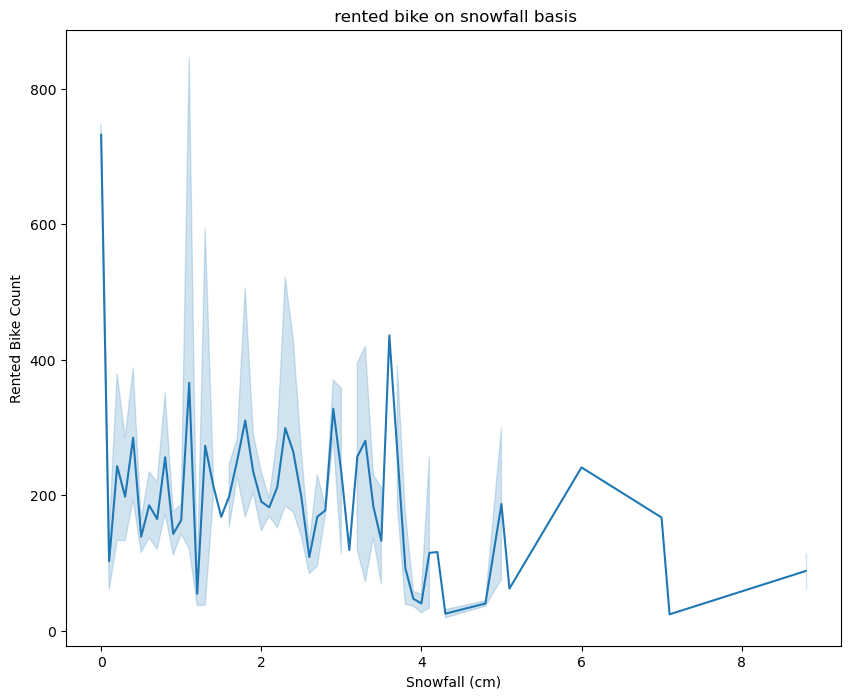

In [1432]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on snowfall basis')
plt.show()

In [1433]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

**as snowfall is likely o means no snowfall has highest no of bikes rented as then up and down as snowfall increases**

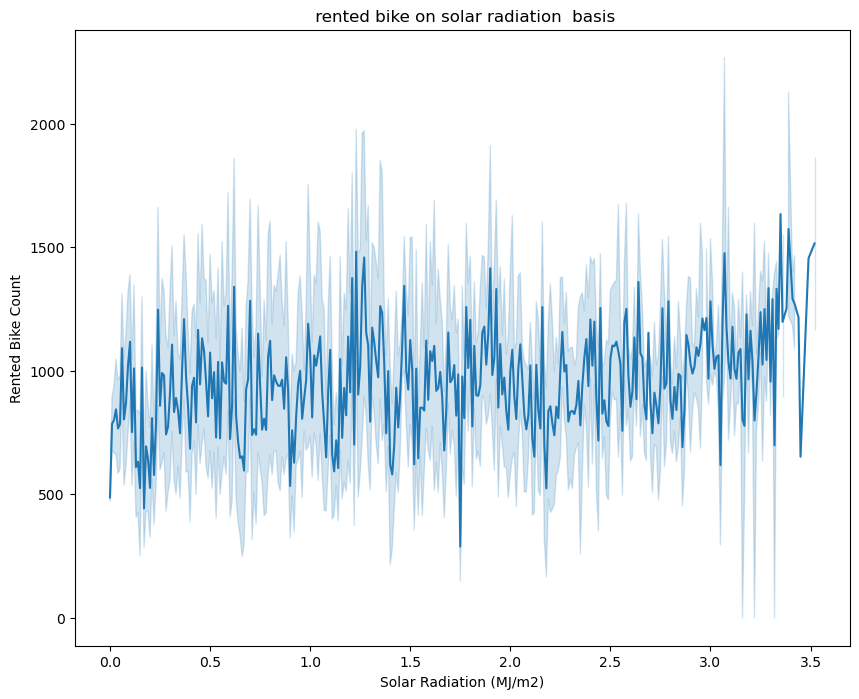

In [1434]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on solar radiation  basis')
plt.show()

**as solar radiation not affecting much on bike count as values not changing suddenly anywhere**

In [1435]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

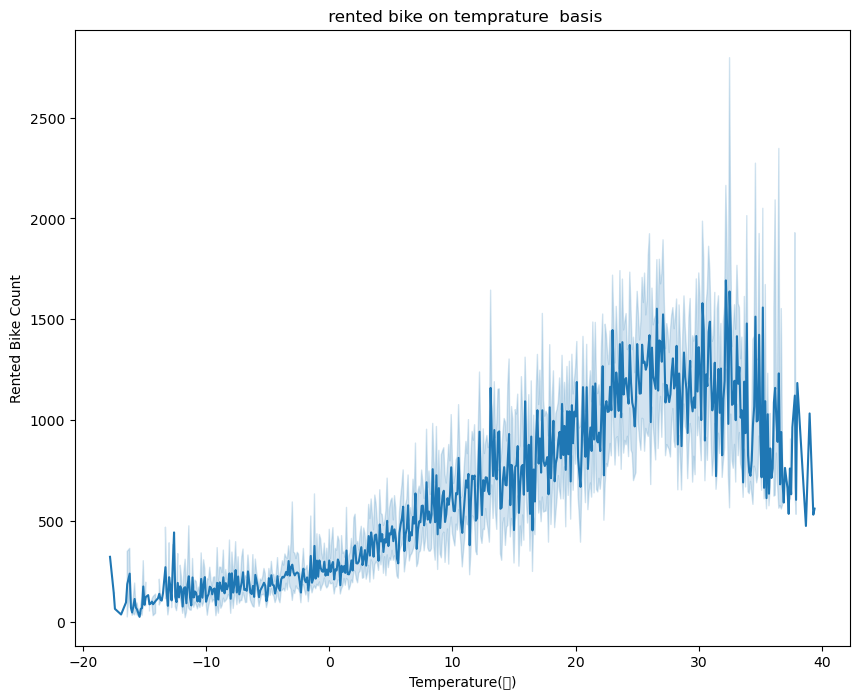

In [1436]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature(蚓)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on temprature  basis')
plt.show()

**as temprature low or below 16 there is less no of bike rented as temprature increses above 16 or 18 there is incresing no of bikes rented**
**temparture between 26-32-34 constatnt bike rent which is above almost 1400 -1500 constant and 32 where slightly highest no and then again decreasing as temprature goes increasing**

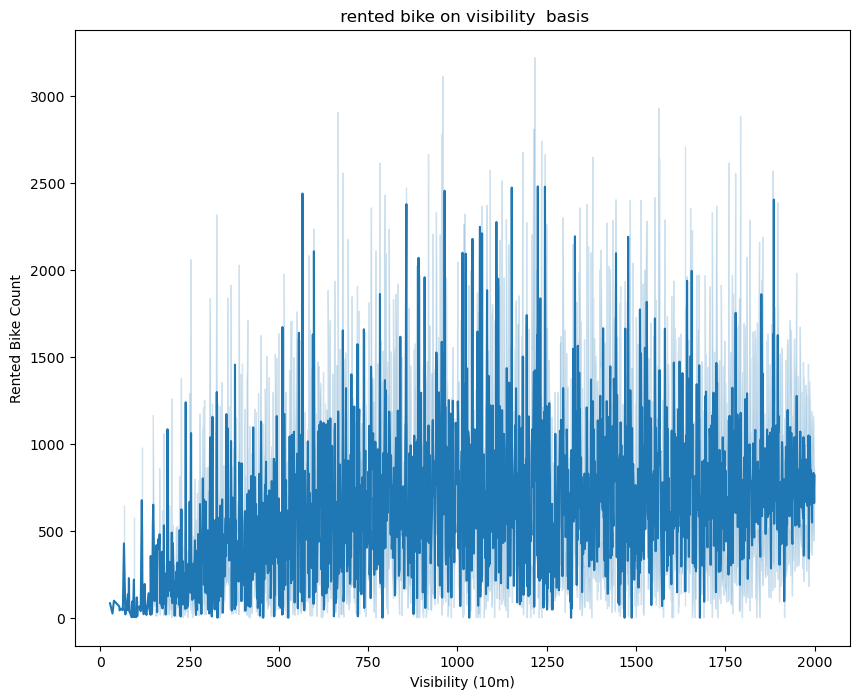

In [1437]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Visibility (10m)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on visibility  basis')
plt.show()

**as clearly se visibilty that much not problem or affcting on renting bike**

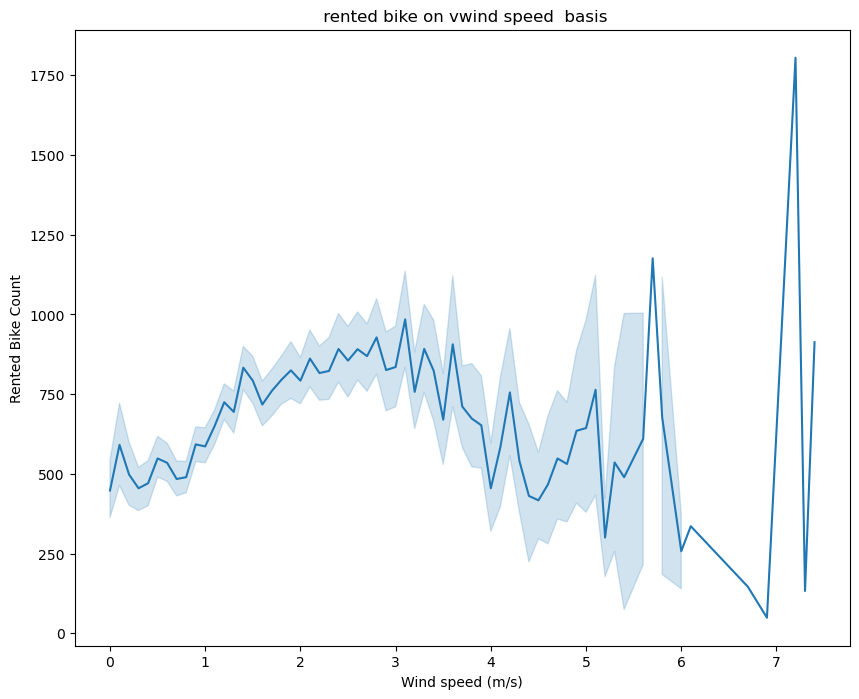

In [1438]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Wind speed (m/s)',y='Rented Bike Count',data=bike)
plt.title(' rented bike on vwind speed  basis')
plt.show()

**as windspeed between 0-3m/s there is increasing count of rented bikes and them sudden drop and slightly increseing decreasing of upto 3-5.5 m/s speed then sudden increasing then sudeen decreasing upto 7**
**after 7 huge count and having highest count**

In [1439]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

## Check the outliers now

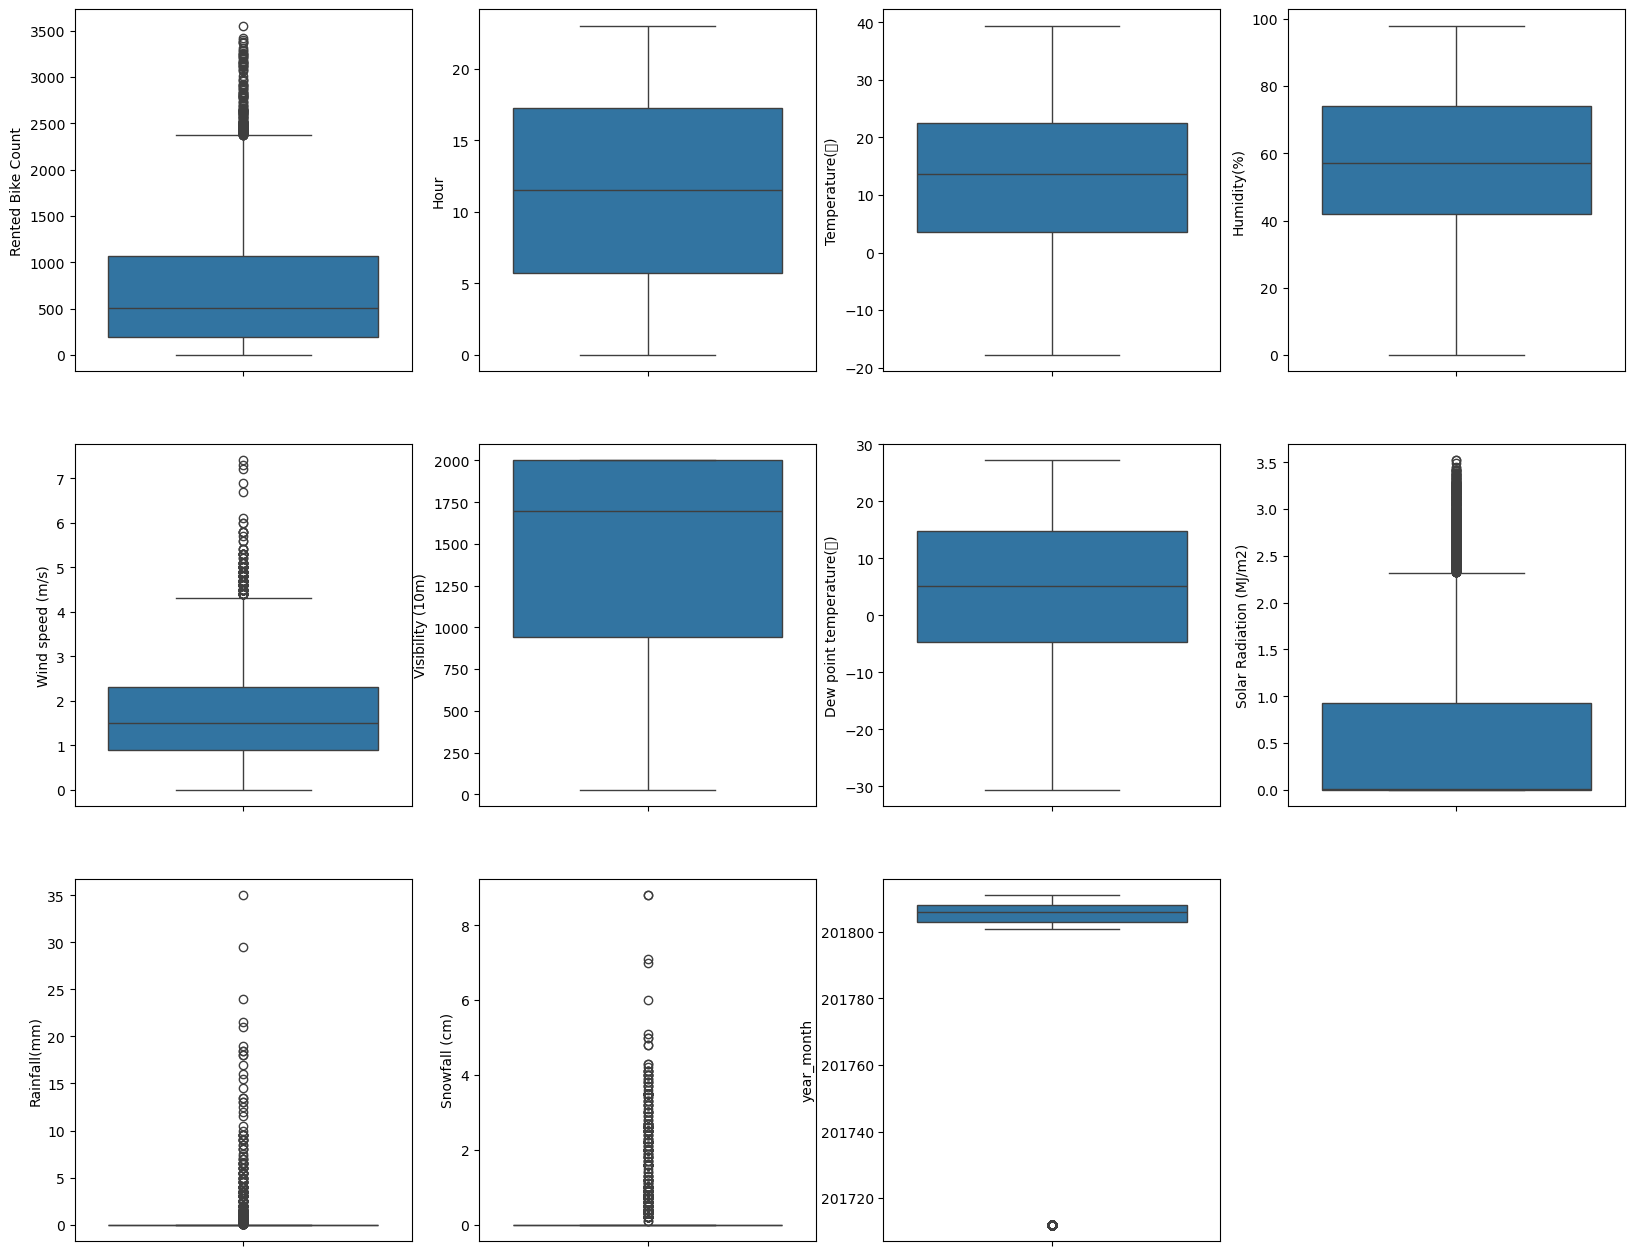

In [1440]:
list1=['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','year_month']
plt.figure(figsize=(20,16))
for index,item in enumerate(list1):
  plt.subplot(3,4,index+1)
  sns.boxplot(bike[item])

**We have to treat windspeed and rainfall and sowfall data column outliers thats higehst rainfall and snowfall and windspeed to drive vehicle is not feaseble as practical conditions**
**we will replace with upper whisker and lower whisker and 0.99 pecentile for snow and rainfall as it ha value 0 max**

In [1441]:
bike['Rainfall(mm)'].value_counts()

Rainfall(mm)
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: count, Length: 61, dtype: int64

In [1442]:
bike['Snowfall (cm)'].value_counts()

Snowfall (cm)
0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: count, dtype: int64

In [1443]:
outlier_cols = ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [1444]:
#remove outlier of solar radiation column and wind speed
def replace_outliers_with_clip(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    
    df[column_name] = df[column_name].clip(lower=lower_whisker, upper=upper_whisker)

In [1445]:
replace_outliers_with_clip(bike, 'Solar Radiation (MJ/m2)')

In [1446]:
replace_outliers_with_clip(bike, 'Wind speed (m/s)')

In [1447]:
#as snowfall and rainfall maximum value are closes to 0 we will take value 0.99 percentile 

In [1448]:
#.clip is used to trim specific values from particular data or coulumn
rainfall_99_outlier=bike['Rainfall(mm)'].quantile(0.99)
bike['Rainfall(mm)'] = bike['Rainfall(mm)'].clip(upper=rainfall_99_outlier)

In [1449]:
snowfall_99_outlier=bike['Snowfall (cm)'].quantile(0.99)
bike['Snowfall (cm)'] = bike['Snowfall (cm)'].clip(upper=snowfall_99_outlier)

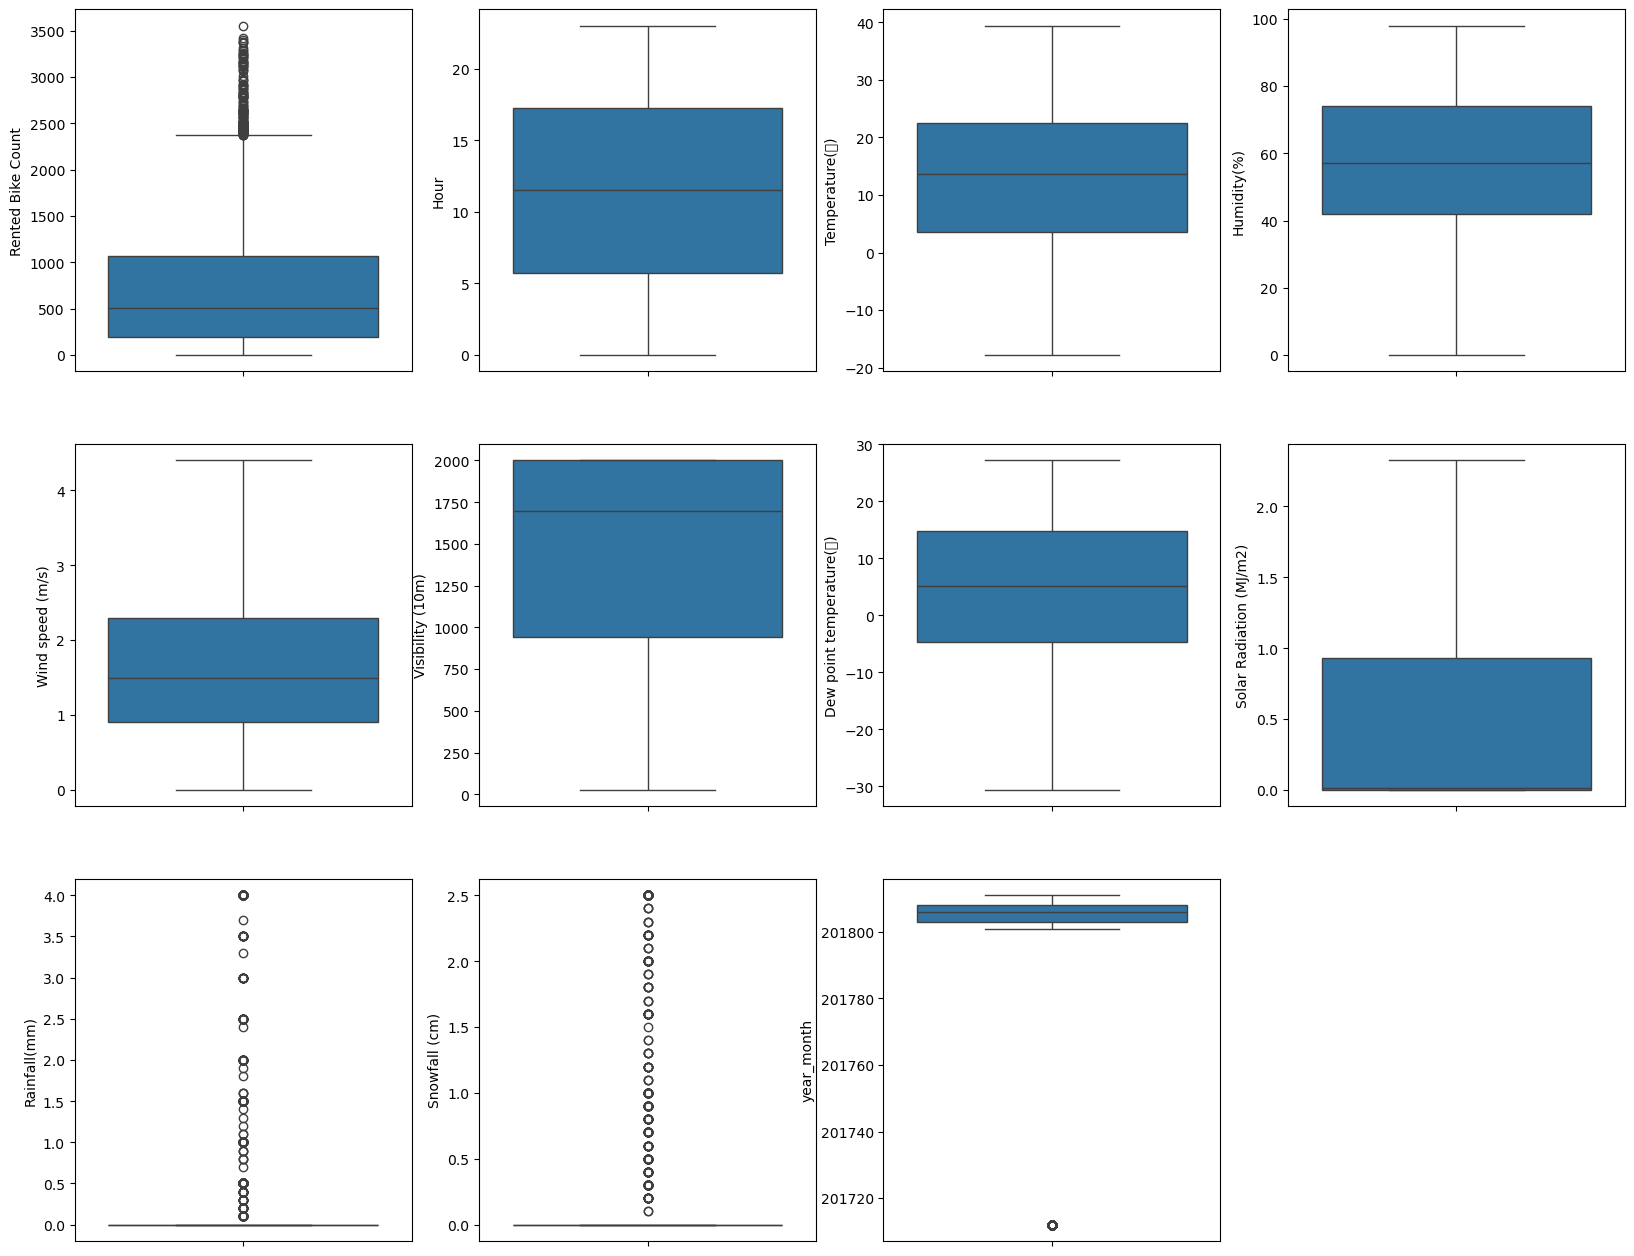

In [1450]:
list1=['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','year_month']
plt.figure(figsize=(20,16))
for index,item in enumerate(list1):
  plt.subplot(3,4,index+1)
  sns.boxplot(bike[item])

In [1451]:
bike.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year_month'],
      dtype='object')

# store object column and numerical column seprate for skewness

In [1395]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(蚓)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(蚓)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   object 
 11  Holiday                   8760 non-null   object 
 12  Functioning Day           8760 non-null   object 
 13  year                      8760 non-null   int32  
 14  month   

In [1452]:
#seprate the categorical and numerical data seprate
bike_cat_df = bike.select_dtypes(include=['object'])

bike_num_df = bike.select_dtypes(include=['float64','int64','int32'])

In [1453]:
from scipy.stats import skew

Rented Bike Count
0.23732144485836718


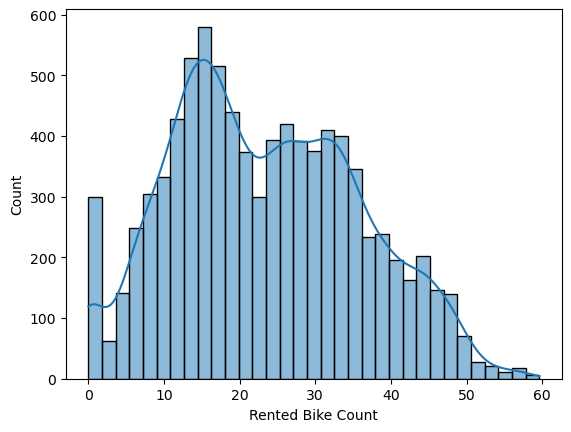

Hour
0.0


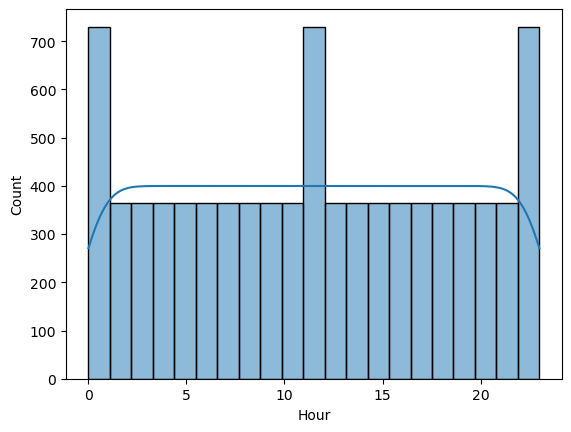

Temperature(蚓)
-0.19829157303281608


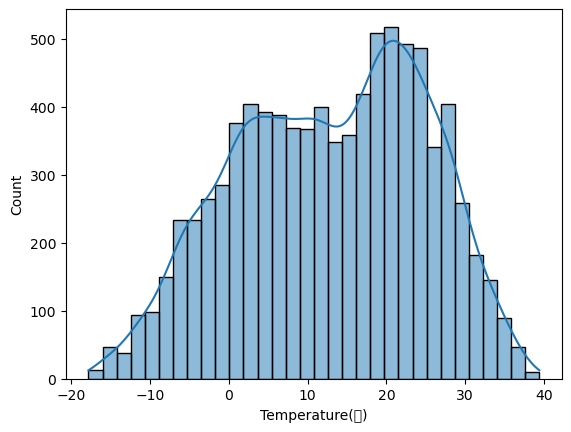

Humidity(%)
0.059568770212928474


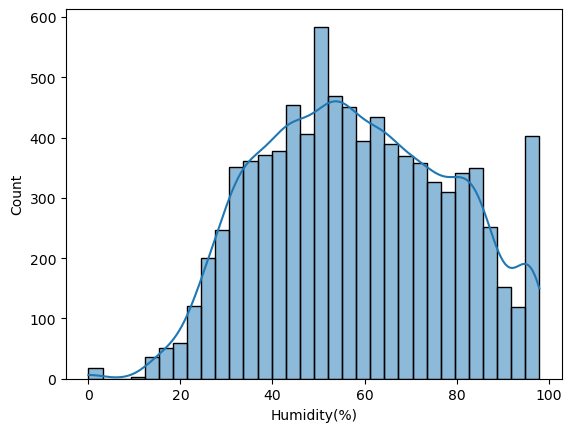

Wind speed (m/s)
-0.07988527186771498


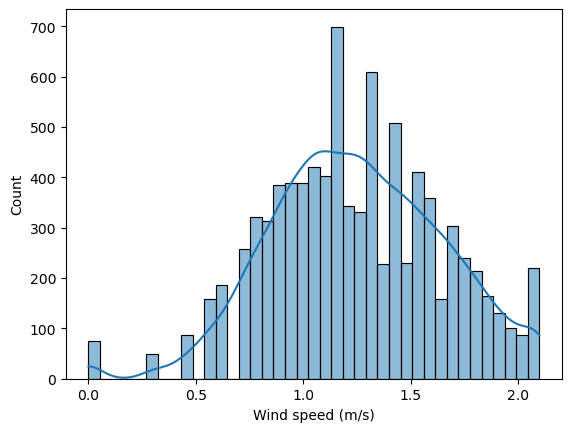

Visibility (10m)
-0.7016662743215496


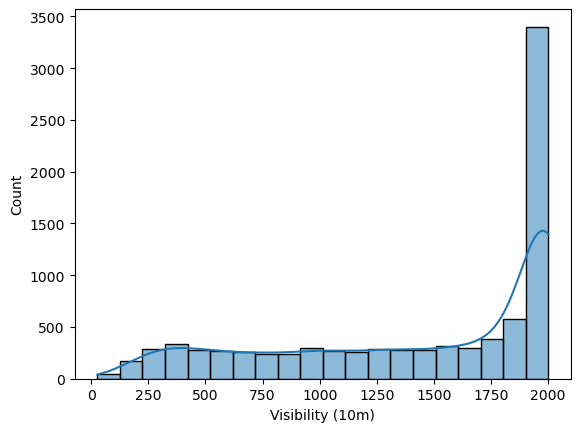

Dew point temperature(蚓)
-0.36723554310224116


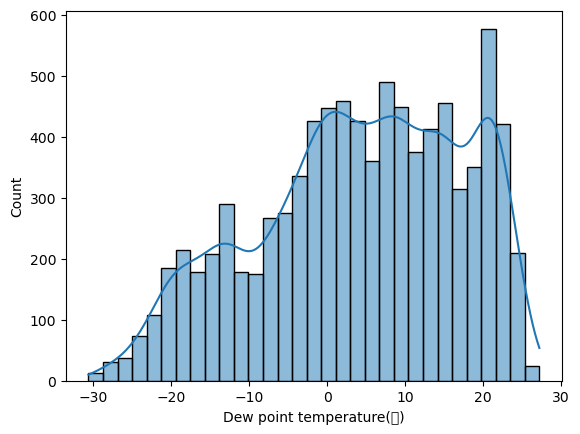

Solar Radiation (MJ/m2)
0.09271848110409647


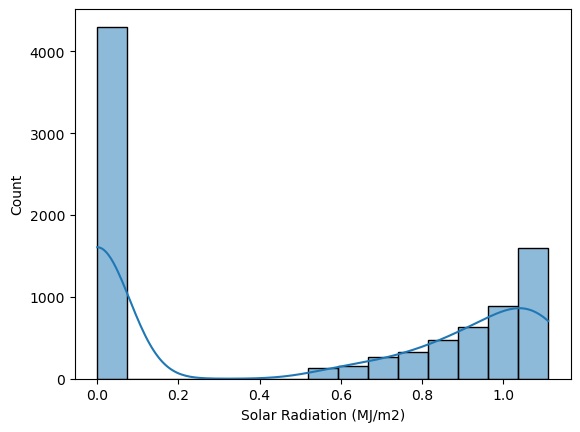

Rainfall(mm)
3.697264292759406


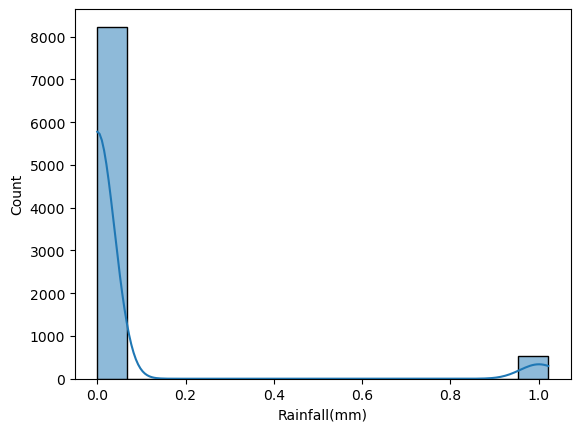

Snowfall (cm)
4.102203418319822


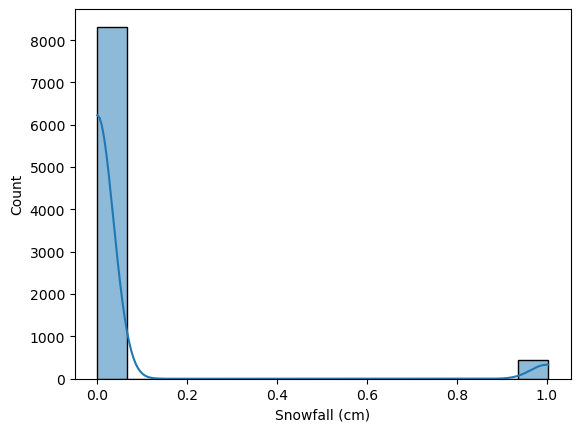

year_month
-2.9076661700710646


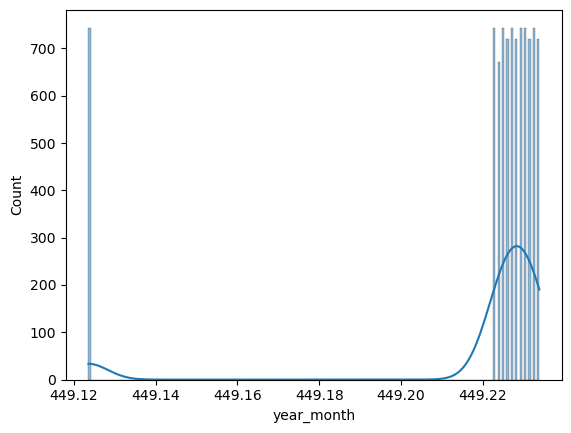

In [1476]:
#check the skewness of each column and treat required column with sqrt or log method
for col in bike_num_df:
    print(col)
    print(skew(bike_num_df[col]))

    plt.figure()
    sns.histplot(bike_num_df[col], kde=True)
    plt.show()

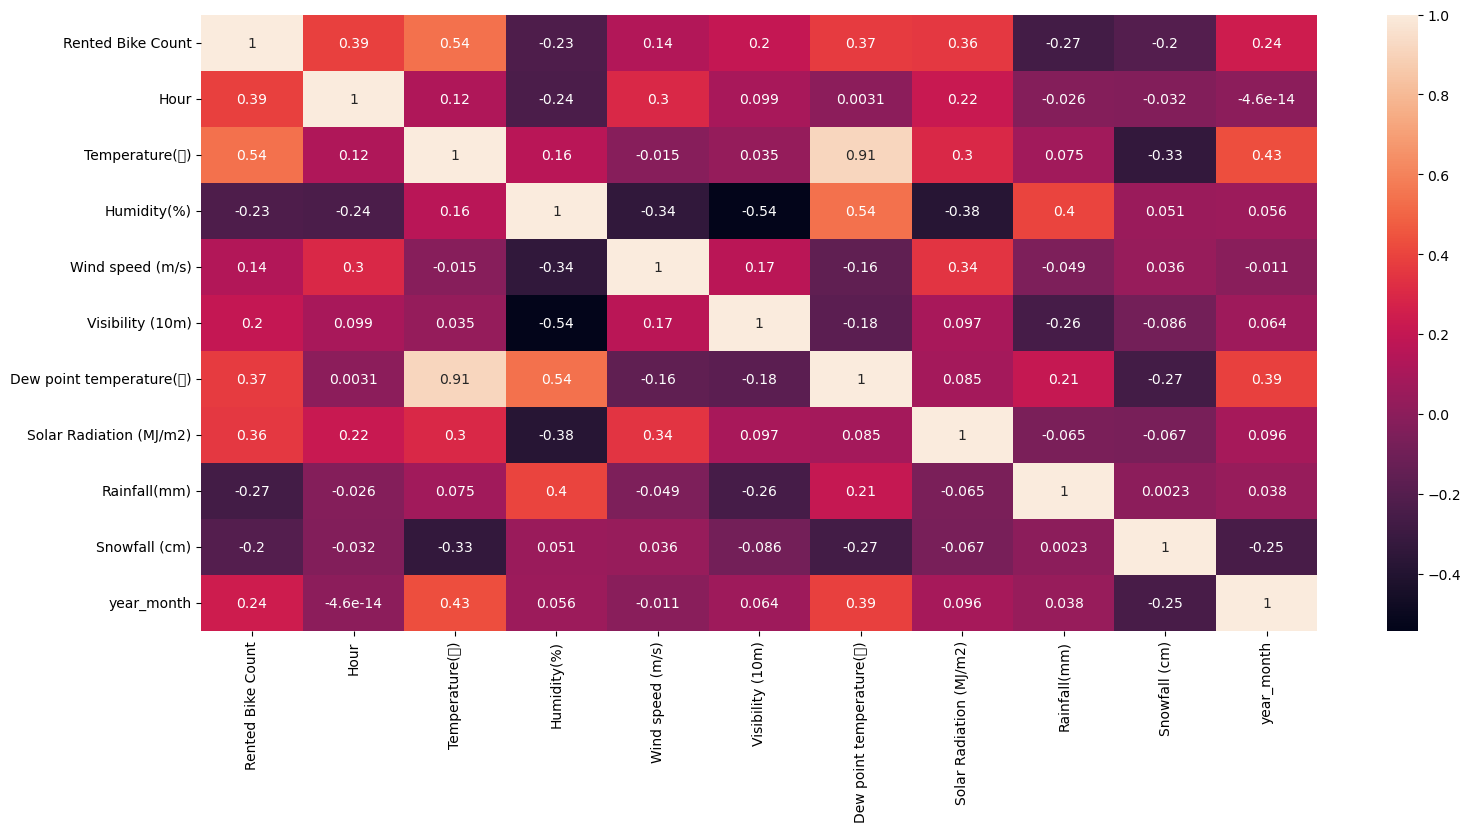

In [1477]:
plt.figure(figsize=(18,8))
sns.heatmap(bike_num_df.corr(),annot=True)
plt.show()

**Remove skewness following column**

**windspeed previous value=0.714 after treat value= -0.079**
 
**rented bike prvious value=1.153 after treat value=0.23**

**solar radiation previous value =1.26 after treat value=0.09**

**rainfall and snowfall previous value =6.30 and 5.99 after treat 3.69 and 4.10 as there is more scope to reduce**

**hour column is skew free has value 0.0 without treatment**

**humidity ,temprature , has good value as no need of treatment**

In [1458]:
bike_num_df['Wind speed (m/s)']=np.sqrt(bike_num_df['Wind speed (m/s)'])

In [1461]:
bike_num_df['Solar Radiation (MJ/m2)']=np.sqrt(bike_num_df['Solar Radiation (MJ/m2)'])

In [1467]:
bike_num_df['Rainfall(mm)']=np.sqrt(bike_num_df['Rainfall(mm)'])

In [1475]:
bike_num_df['Snowfall (cm)']=np.sqrt(bike_num_df['Snowfall (cm)'])

In [1457]:
bike_num_df['Rented Bike Count']=np.sqrt(bike_num_df['Rented Bike Count'])

In [1456]:
bike_num_df['year_month']=np.sqrt(bike_num_df['year_month'])

## convert categorical column into numerical

In [1478]:
bike_cat_df.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [1479]:
bike_cat_df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [1480]:
bike_cat_df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [1482]:
bike_cat_df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

**As all 3 columns value are less than 5 nos so here we can use one hot encoding as no data is ordinal to use labelencoding or more than 5 nos of data**

In [1483]:
#One hot encoding
bike_cat_season=pd.get_dummies(bike_cat_df['Seasons'],dtype='int64')

In [1484]:
bike_cat_holiday=pd.get_dummies(bike_cat_df['Holiday'],dtype='int64')
bike_cat_function=pd.get_dummies(bike_cat_df['Functioning Day'],dtype='int64')

In [1485]:
#store new categorical column into new variable
bike_new_cat=pd.concat([bike_cat_season,bike_cat_holiday,bike_cat_function],axis=1)

## Sperate Variable to check Multicollinearity between columns

In [1725]:
x=bike_num_df.drop('Rented Bike Count',axis=1)
y=bike_num_df[['Rented Bike Count']]

# check the vif of column

In [1726]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1727]:
VIF_DATA=pd.DataFrame()
VIF_DATA['features']=x.columns

In [1728]:
VIF_DATA["VIF"] = [variance_inflation_factor(x.values,i) 
						for i in range(len(x.columns))] 
print(VIF_DATA)

                   features         VIF
0                      Hour    4.374074
1            Temperature(蚓)  180.763031
2               Humidity(%)  195.345255
3          Wind speed (m/s)   13.807491
4          Visibility (10m)   10.194114
5  Dew point temperature(蚓)  124.309691
6   Solar Radiation (MJ/m2)    3.164104
7              Rainfall(mm)    1.338083
8             Snowfall (cm)    1.219278
9                year_month  414.752047


In [ ]:
# Apply pca on temp and dew point temp as they are corelated each other as we see on heat map as value was 0.91 highly corelated

In [1729]:
#Import library for PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1730]:
#Store into new variable on column which have to apply PCA
pca_columns = ['Temperature(蚓)','Dew point temperature(蚓)']

In [1732]:
#Import scaler library to apply on PCA Column as need to do scaling before application
scaler = StandardScaler()
pca_data = scaler.fit_transform(bike_num_df[pca_columns])

In [1746]:
# Apply pca to make it one column and give new column name as PCA Do not contain column name
pca = PCA(n_components=1)
bike_num_df['PCA_temp'] = pca.fit_transform(pca_data)

In [1747]:
#Drop older column before PCA
bike_num_df = bike_num_df.drop(columns=pca_columns)

In [1748]:
#Check the dataset is null free after PCA Transformation
print(bike_num_df.isnull().sum())

Rented Bike Count          0
Hour                       0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
year_month                 0
PCA_temp                   0
dtype: int64


In [1749]:
X=bike_num_df.drop('Rented Bike Count',axis=1)
Y=bike_num_df[['Rented Bike Count']]

In [1750]:
X.head()

,Hour,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year_month,PCA_temp
0,0,0.0,0.0,0.0,449.123591,-1.510485
1,1,0.0,0.0,0.0,449.123591,-0.813411
2,2,0.0,0.0,0.0,449.123591,-0.900077
3,3,0.0,0.0,0.0,449.123591,-0.809664
4,4,0.0,0.0,0.0,449.123591,-1.580602


In [1751]:
#Now after pca check again VIF Score 
VIF_DATA=pd.DataFrame()
VIF_DATA['features']=X.columns

In [1752]:
VIF_DATA["VIF"] = [variance_inflation_factor(X.values,i) 
						for i in range(len(X.columns))] 
print(VIF_DATA)

                  features       VIF
0                     Hour  4.149807
1  Solar Radiation (MJ/m2)  2.331912
2             Rainfall(mm)  1.208757
3            Snowfall (cm)  1.059320
4               year_month  4.765539
5                 PCA_temp  1.354058


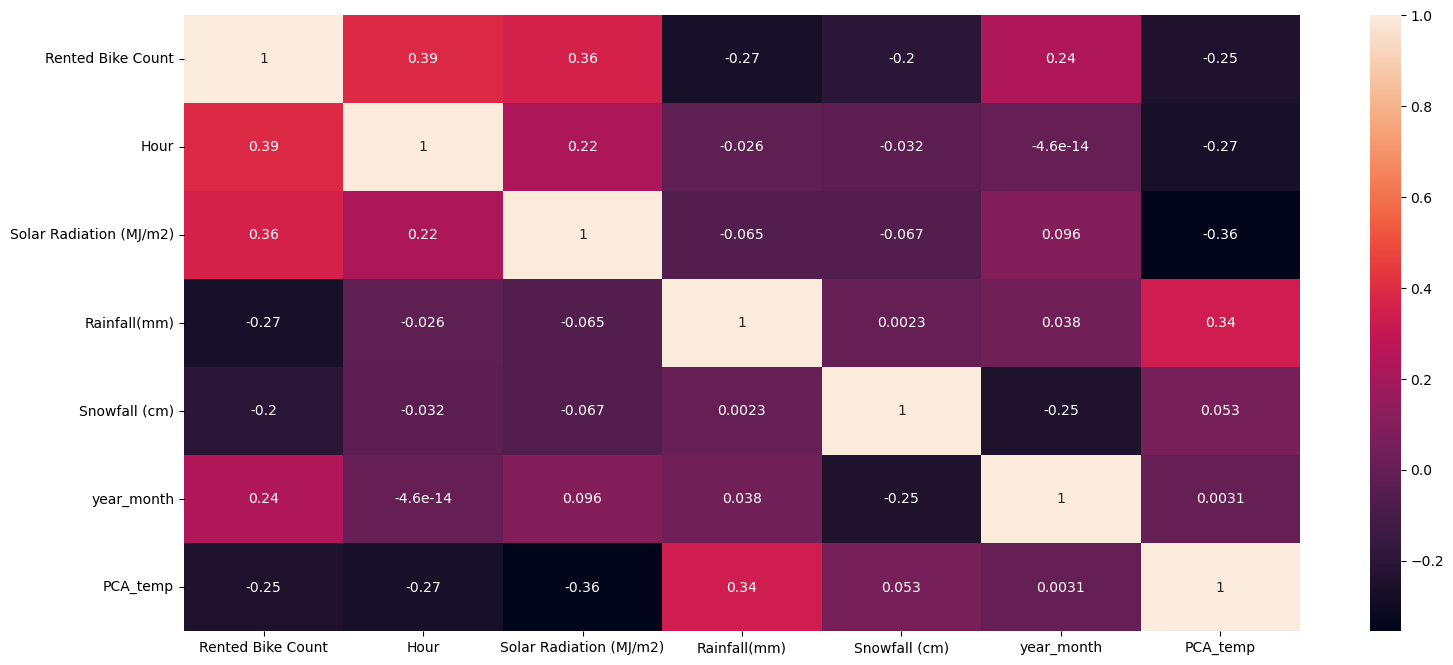

In [1753]:
plt.figure(figsize=(18,8))
sns.heatmap(bike_num_df.corr(),annot=True)
plt.show()

In [1754]:
#Now concate numerical and categorical column

In [1755]:
bike_new=pd.concat([bike_num_df,bike_new_cat],axis=1)

In [1756]:
bike_new.head()

,Rented Bike Count,Hour,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year_month,PCA_temp,Autumn,Spring,Summer,Winter,Holiday,No Holiday,No,Yes
0,15.937377,0,0.0,0.0,0.0,449.123591,-1.510485,0,0,0,1,0,1,0,1
1,14.282857,1,0.0,0.0,0.0,449.123591,-0.813411,0,0,0,1,0,1,0,1
2,13.152946,2,0.0,0.0,0.0,449.123591,-0.900077,0,0,0,1,0,1,0,1
3,10.344080,3,0.0,0.0,0.0,449.123591,-0.809664,0,0,0,1,0,1,0,1
4,8.831761,4,0.0,0.0,0.0,449.123591,-1.580602,0,0,0,1,0,1,0,1


## Sperate dependant variable from main variable to pass into train test split

In [1757]:
X=bike_new.drop('Rented Bike Count',axis=1)
Y=bike_new[['Rented Bike Count']]

**AFter PCA application all columns having values below 5 or 5**

* **Now data is ready for traning**

In [1758]:
#Pass the dataset into train test split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =16)

In [1759]:
#check the shape of trai and test split in x train and ytrain and ytrain and ytest
print(f'The shapes of train and test set for independent variables are: X_train={X_train.shape}, X_test={X_test.shape}')
print(f'The shapes of train and test set for dependent variables are: y_train={y_train.shape}, y_test={y_test.shape}')

The shapes of train and test set for independent variables are: X_train=(7008, 14), X_test=(1752, 14)
The shapes of train and test set for dependent variables are: y_train=(7008, 1), y_test=(1752, 1)


In [1760]:
#scale the model

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

#Linear Regression Model 

In [1761]:
# Import Library
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [1762]:
#train dataset
Lr.fit(X_train,y_train)

LinearRegression()

In [1763]:
Lr.coef_

array([[ 3.9618896 ,  2.09254625, -3.38756196, -0.37488399, -0.72960412,
        -1.24955432,  1.81498974,  0.26509563,  2.61898982, -4.75628487,
        -0.21992725,  0.21992725, -2.54158669,  2.54158669]])

In [1764]:
Lr.intercept_

array([23.42540465])

In [1765]:
# Get the predicted classes
train_class_linear = Lr.predict(X_train)
test_class_linear = Lr.predict(X_test)

In [1766]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Linear Regression:')
print('The r2 score of training set = ',r2_score(y_train,train_class_linear))
print('The mean squared of training set = ',mean_squared_error(y_train,train_class_linear))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,train_class_linear)))


The evaluation metric values for training set - Linear Regression:
The r2 score of training set =  0.6614403688047894
The mean squared of training set =  52.834671186640065
The root mean squared of training set =  7.26874619082549


In [1767]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - Linear Regression:')
print('The r2 score of testing set = ',r2_score(y_test,test_class_linear))
print('The mean squared of testing set = ',mean_squared_error(y_test,test_class_linear))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,test_class_linear)))

The evaluation metric values for testing set - Linear Regression:
The r2 score of testing set =  0.6504037638113593
The mean squared of testing set =  52.72303698650006
The root mean squared of testing set =  7.261063075507612


In [1768]:
r2_train = r2_score(y_train, train_class_linear)
mse_train = mean_squared_error(y_train, train_class_linear)
rmse_train = math.sqrt(mse_train)

In [1769]:
# Store the metric values in a dictionary
dict1 = {
    'Model': 'linear regression - Before hyperparameter tuning',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'Linear regression Assumption not match'
}

# Create DataFrame
training_df = pd.DataFrame(dict1, index=[0])

In [1770]:
r2_test = r2_score(y_test, test_class_linear)
mse_test = mean_squared_error(y_test,test_class_linear)
rmse_test = math.sqrt(mse_test)

In [1771]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'linear regression - Before hyperparameter tuning',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'rLinear regression Assumption not match'
}

# Create DataFrame
test_df = pd.DataFrame(dict2, index=[0])

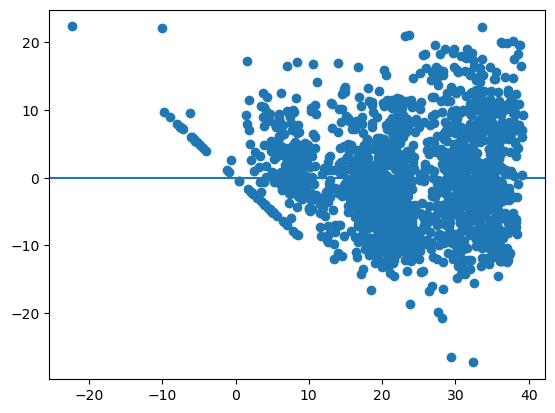

In [1772]:
residual=y_test-test_class_linear
plt.scatter(test_class_linear,residual)
plt.axhline(y=0)

**as per assumptions of linear regression homocascadity not achieve so this model cannot consider**
**for better performance we already removed multicollinearity of columns and apply pca**
**R2 score got 66% on train and tets 65%**


<Axes: ylabel='Count'>

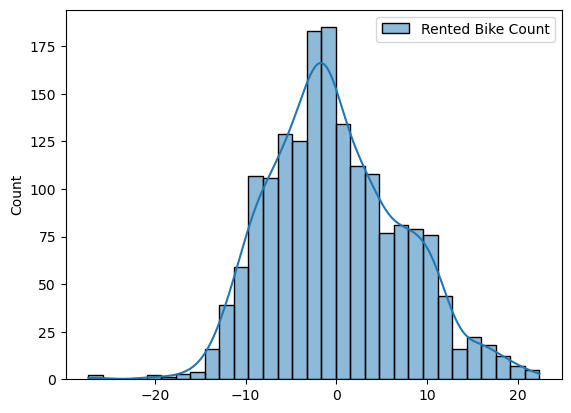

In [1773]:
sns.histplot(residual, kde=True)

## Linear Regression model with hypertunning

In [1774]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [1775]:
# Define the Ridge and lasso penaulty model
ridge = Ridge()
lasso=Lasso()

In [1776]:
param_dist = {
    'alpha':list(np.arange(0.1, 10,)),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

In [1777]:
random_ = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,        
    verbose=1,
    random_state=42,
    n_jobs=-1)

In [1778]:
# Fit RandomizedSearchCV
random_.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 1.1, 2.1, 3.1, 4.1, 5.1,
                                                  6.1, 7.1, 8.1, 9.1],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg']},
                   random_state=42, verbose=1)

In [1779]:
random_.best_params_

{'solver': 'lsqr', 'alpha': 9.1}

In [1780]:
# Best model from RandomizedSearchCV
best_model = random_.best_estimator_
best_model

Ridge(alpha=9.1, solver='lsqr')

In [1781]:
# Make predictions train and tets
y_train_pred_linear_rand = best_model.predict(X_train)
y_test_pred_linear_rand = best_model.predict(X_test)

In [1782]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Linear Regression with hyperparametertunning:')
print('The r2 score of training set = ',r2_score(y_train,y_train_pred_linear_rand))
print('The mean squared of training set = ',mean_squared_error(y_train,y_train_pred_linear_rand))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_train_pred_linear_rand)))

The evaluation metric values for training set - Linear Regression with hyperparametertunning:
The r2 score of training set =  0.6614394243025177
The mean squared of training set =  52.83481858302867
The root mean squared of training set =  7.268756329870239


In [1783]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - Linear Regression with hyperparametrtunning:')
print('The r2 score of testing set = ',r2_score(y_test,y_test_pred_linear_rand))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_test_pred_linear_rand))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_test_pred_linear_rand)))

The evaluation metric values for testing set - Linear Regression with hyperparametrtunning:
The r2 score of testing set =  0.6503979101231605
The mean squared of testing set =  52.723919788393985
The root mean squared of testing set =  7.261123865380206


In [1784]:
r2_train = r2_score(y_train,y_train_pred_linear_rand)
mse_train = mean_squared_error(y_train,y_train_pred_linear_rand)
rmse_train = math.sqrt(mse_train)

In [1785]:
dict1 = {
    'Model': 'linear regression - after hyperparameter tuning',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'Linear regression Assumption not match'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1786]:
r2_test = r2_score(y_test,y_test_pred_linear_rand)
mse_test = mean_squared_error(y_test,y_test_pred_linear_rand)
rmse_test = math.sqrt(mse_test)

In [1787]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'linear regression - after hyperparameter tuning',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'Linear regression Assumption not match'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

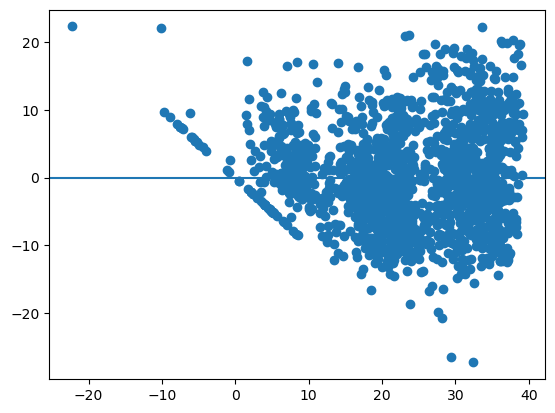

In [1788]:
residual=y_test-y_test_pred_linear_rand
plt.scatter(y_test_pred_linear_rand,residual)
plt.axhline(y=0)

**as per assumptions of linear regression homocascadity not achieve so this model cannot consider**
**After applying hyperparameter tunning still not performed and not achieved assumption of linear regresssion**
**R2 score got 66% on train and tets 65%**

## Polynomial Regression

In [1789]:
#Import Library
from sklearn.preprocessing import PolynomialFeatures

In [1790]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

In [1791]:
# train dataset
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [1792]:
y_pred_trainpoly = lr.predict(x_train_trans)
y_pred_testpoly=lr.predict(x_test_trans)

In [1793]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Polynomial Regression:')
print('The r2 score of training set = ',r2_score(y_train,y_pred_trainpoly))
print('The mean squared of training set = ',mean_squared_error(y_train,y_pred_trainpoly))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_pred_trainpoly)))

The evaluation metric values for training set - Polynomial Regression:
The r2 score of training set =  0.8475144950445299
The mean squared of training set =  23.796462344341677
The root mean squared of training set =  4.878161779230131


In [1794]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - Polynomial Regression:')
print('The r2 score of testing set = ',r2_score(y_test,y_pred_testpoly))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_pred_testpoly))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_pred_testpoly)))

The evaluation metric values for testing set - Polynomial Regression:
The r2 score of testing set =  0.8377000797449647
The mean squared of testing set =  24.47664995424877
The root mean squared of testing set =  4.947388195224706


In [1795]:
r2_train = r2_score(y_train,y_pred_trainpoly)
mse_train = mean_squared_error(y_train,y_pred_trainpoly)
rmse_train = math.sqrt(mse_train)

In [1796]:
dict1 = {
    'Model': 'polynomial regression',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'r2 score best performed'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1797]:
r2_test = r2_score(y_test,y_pred_testpoly)
mse_test = mean_squared_error(y_test,y_pred_testpoly)
rmse_test = math.sqrt(mse_test)

In [1798]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'Polynomial regression',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'r2 best  performed'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

In [1799]:
type(y_pred_testpoly)

numpy.ndarray

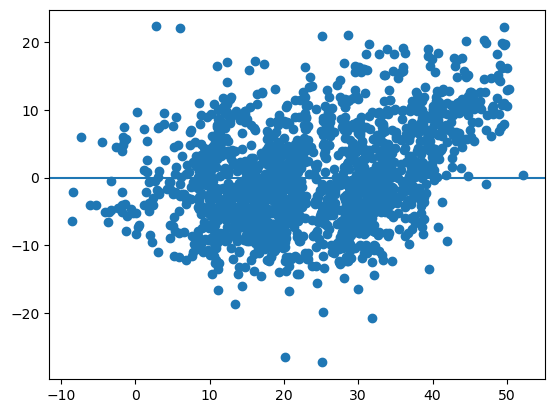

In [1800]:
residu=y_test-y_pred_testpoly
plt.scatter(y_pred_testpoly,residual)
plt.axhline(y=0)

**as degree of model incresing we got good performance with penaulty model ridge using got training 85% and test data 84% r2score but still problem of homocacadity is still there**

<Axes: ylabel='Count'>

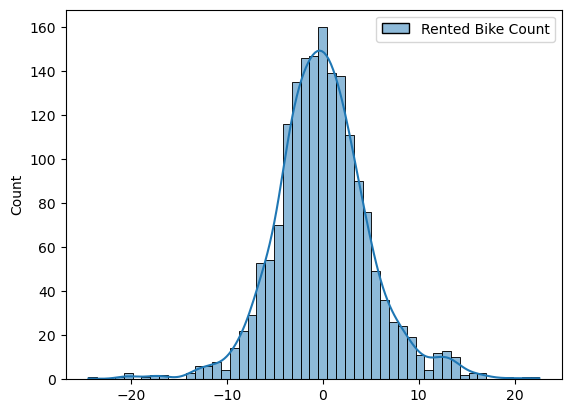

In [1801]:
sns.histplot(residu, kde=True)

## Random Forest Regression Model

In [1802]:
# Import Library
from sklearn.ensemble import RandomForestRegressor

In [1803]:
rf_model = RandomForestRegressor(n_estimators=120, random_state=16)

In [1804]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=16)

In [1805]:
#  prediction on the training and test sets
y_train_pred_random = rf_model.predict(X_train)
y_test_pred_random = rf_model.predict(X_test)

In [1806]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random  Regression:')
print('The r2 score of training set = ',r2_score(y_train,y_train_pred_random))
print('The mean squared of training set = ',mean_squared_error(y_train,y_train_pred_random))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_train_pred_random)))

The evaluation metric values for training set - Random  Regression:
The r2 score of training set =  0.9807771037562866
The mean squared of training set =  2.9998715402247385
The root mean squared of training set =  1.7320137240289808


In [1807]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - Random Regression:')
print('The r2 score of testing set = ',r2_score(y_test,y_test_pred_random))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_test_pred_random))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_test_pred_random)))

The evaluation metric values for testing set - Random Regression:
The r2 score of testing set =  0.859923770221642
The mean squared of testing set =  21.125067947095413
The root mean squared of testing set =  4.596201469376143


In [1808]:
r2_train = r2_score(y_train,y_train_pred_random)
mse_train = mean_squared_error(y_train,y_train_pred_random)
rmse_train = math.sqrt(mse_train)

In [1809]:
dict1 = {
    'Model': 'Random regression without hyperparameter',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'r2 score overfitting'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1810]:
r2_test = r2_score(y_test,y_test_pred_random)
mse_test = mean_squared_error(y_test,y_test_pred_random)
rmse_test = math.sqrt(mse_test)

In [1811]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'random regression without hyperparameter',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'r2 score overfitting'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**as r2 score got 98% and 86% on test as bias low and variance high model got overfitt**

## Random Regression with hypertuning

In [1812]:
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators':list(np.arange(80, 200, 20, dtype='int64')),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': list(np.arange(12, 30, 2, dtype='int64')),
    'min_samples_split': list(np.arange(50, 200, 10, dtype='int64')),
    'min_samples_leaf': list(np.arange(40, 80, 10, dtype='int64')),
    'bootstrap': [True, False]
}

In [1813]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,        
    verbose=2,  
    random_state=42,
    n_jobs=-1     
)

In [1814]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [12, 14, 16, 18, 20, 22,
                                                      24, 26, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [40, 50, 60, 70],
                                        'min_samples_split': [50, 60, 70, 80,
                                                              90, 100, 110, 120,
                                                              130, 140, 150,
                                                              160, 170, 180,
                                                              190],
                                        'n_estimators': [80, 100, 120, 140, 160,
                                                         180]},
                   random_state=42, verbose=2)

In [1815]:
# Get the best model from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

In [1816]:
best_rf_model

RandomForestRegressor(max_depth=28, max_features='auto', min_samples_leaf=40,
                      min_samples_split=90, n_estimators=120, random_state=42)

In [1817]:
# Make predictions on the training and test sets
y_train_pred_rand_hyper = best_rf_model.predict(X_train)
y_test_pred_rand_hyper = best_rf_model.predict(X_test)

In [1818]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random  Regression with hyperparametrtunning:')
print('The r2 score of training set = ',r2_score(y_train,y_train_pred_rand_hyper))
print('The mean squared of training set = ',mean_squared_error(y_train,y_train_pred_rand_hyper))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_train_pred_rand_hyper)))

The evaluation metric values for training set - Random  Regression with hyperparametrtunning:
The r2 score of training set =  0.8510200630600453
The mean squared of training set =  23.24939318323617
The root mean squared of training set =  4.821762456118734


In [1819]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - Random Regression with hyperparametrtunning:')
print('The r2 score of testing set = ',r2_score(y_test,y_test_pred_rand_hyper))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_test_pred_rand_hyper))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_test_pred_rand_hyper)))

The evaluation metric values for testing set - Random Regression with hyperparametrtunning:
The r2 score of testing set =  0.8498649047282364
The mean squared of testing set =  22.642057784379837
The root mean squared of testing set =  4.75836713425728


In [1820]:
r2_train = r2_score(y_train,y_train_pred_rand_hyper)
mse_train = mean_squared_error(y_train,y_train_pred_rand_hyper)
rmse_train = math.sqrt(mse_train)

In [1821]:
dict1 = {
    'Model': 'Random regression with hyperparameter',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'r2 score best performed'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1822]:
r2_test = r2_score(y_test,y_test_pred_rand_hyper)
mse_test = mean_squared_error(y_test,y_test_pred_rand_hyper)
rmse_test = math.sqrt(mse_test)

In [1823]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'random regression with hyperparameter',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'r2 score best performed'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**After Hypertunning r2 score 85% on tranining and 85% on test data so model best performed**

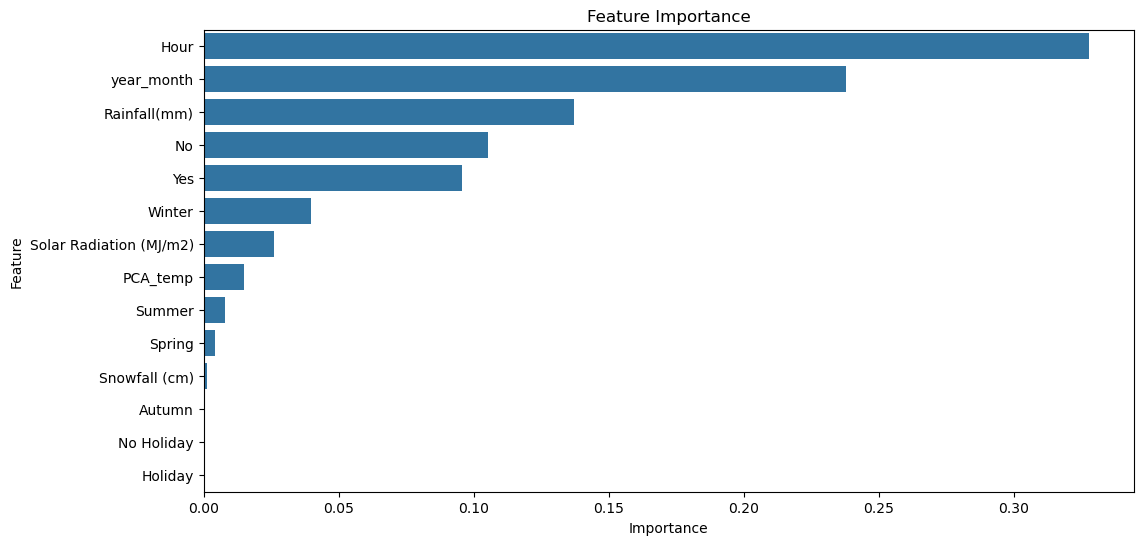

In [1824]:
# Feature importance
importance = best_rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Model use Hour as important column and year_month column along with rainfall data most**
**holiday and non holiday not considered by column**

## Xg boost Regression Model

In [1825]:
#Import library 
from xgboost import XGBRegressor

In [1826]:
xgb_model = XGBRegressor(random_state=26)

In [1827]:
# Fit the model on the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=26, ...)

In [1828]:
# predictions on the training and test
y_train_pred_xg = xgb_model.predict(X_train)
y_test_pred_xg = xgb_model.predict(X_test)

In [1829]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - xg boost regression:')
print('The r2 score of training set = ',r2_score(y_train,y_train_pred_xg))
print('The mean squared of training set = ',mean_squared_error(y_train,y_train_pred_xg))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_train_pred_xg)))

The evaluation metric values for training set - xg boost regression:
The r2 score of training set =  0.9500032634603786
The mean squared of training set =  7.80235117267383
The root mean squared of training set =  2.7932689044690684


In [1830]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - xgboost Regression:')
print('The r2 score of testing set = ',r2_score(y_test,y_test_pred_xg))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_test_pred_xg))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_test_pred_xg)))

The evaluation metric values for testing set - xgboost Regression:
The r2 score of testing set =  0.8683067289121292
The mean squared of testing set =  19.860823669429983
The root mean squared of testing set =  4.4565484031288145


In [1831]:
r2_train = r2_score(y_train,y_train_pred_xg)
mse_train = mean_squared_error(y_train,y_train_pred_xg)
rmse_train = math.sqrt(mse_train)

In [1832]:
dict1 = {
    'Model': 'xg boost without hyperparameter',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'r2 score overfitting'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1833]:
r2_test = r2_score(y_test,y_test_pred_xg)
mse_test = mean_squared_error(y_test,y_test_pred_xg)
rmse_test = math.sqrt(mse_test)

In [1834]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'xg boost without hyperparameter',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'r2 score good overfitting'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**as xg boost without hyperparameter r2 score got 95% on training and 87% on test there is littile bit of overfitting so we will try with hypertunning**

## XGBoost regression with hypertunning

In [1835]:
xgb_model = XGBRegressor(random_state=42)

In [1880]:
param_dist = {
    'n_estimators':list(np.arange(50, 200, dtype='int64')),
    'learning_rate':[0.01,0.02,0.03,0.04,0.05, 0.3,0.4,0.5],
    'max_depth':list(np.arange(3,10 ,dtype='int64')),
    'min_child_weight':list(np.arange(1,10 ,dtype='int64')),
    'subsample':[0.6, 0.7,0.8],
    'colsample_bytree':[0.5, 0.6,0.8],
    'gamma':[0, 0.2,0,3,0.5]}

In [1881]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [1882]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.8],
                                        'gamma': [0, 0.2, 0, 3, 0.5],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'n_estimators': [50, 51, 52, 53, 54, 55,
                                                         56, 57, 58, 59, 60, 61,
                                                         62, 63, 64, 65, 66, 67,
                                                         68, 69, 70, 71, 72, 73,
                                                         74, 75, 76, 77, 78, 79, ...],
                                        'subsample': [0.6, 0.7, 0.8]},
                   random_state=42, verbose=2)

In [1883]:
best_xgb_model = random_search.best_estimator_
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=154, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1884]:
y_train_pred_xgrand = best_xgb_model.predict(X_train)
y_test_pred_xgrand = best_xgb_model.predict(X_test)

In [1885]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - xg boost regression with hypertunning:')
print('The r2 score of training set = ',r2_score(y_train,y_train_pred_xgrand))
print('The mean squared of training set = ',mean_squared_error(y_train,y_train_pred_xgrand))
print('The root mean squared of training set = ',math.sqrt(mean_squared_error(y_train,y_train_pred_xgrand)))

The evaluation metric values for training set - xg boost regression with hypertunning:
The r2 score of training set =  0.9006418895615044
The mean squared of training set =  15.505549424812964
The root mean squared of training set =  3.937708651590791


In [1886]:
# evalutaing the model using metrics
# finding each of the metrics for testing set

print('The evaluation metric values for testing set - xgboost Regression with hypertunning:')
print('The r2 score of testing set = ',r2_score(y_test,y_test_pred_xgrand))
print('The mean squared of testing set = ',mean_squared_error(y_test,y_test_pred_xgrand))
print('The root mean squared of testing set = ',math.sqrt(mean_squared_error(y_test,y_test_pred_xgrand)))

The evaluation metric values for testing set - xgboost Regression with hypertunning:
The r2 score of testing set =  0.8771442012716217
The mean squared of testing set =  18.528033628105632
The root mean squared of testing set =  4.304420242971826


In [1887]:
r2_train = r2_score(y_train,y_train_pred_xgrand)
mse_train = mean_squared_error(y_train,y_train_pred_xgrand)
rmse_train = math.sqrt(mse_train)

In [1888]:
dict1 = {
    'Model': 'xg boost with hyperparameter',
    'r2score': round(r2_train, 2),
    'mean squared': round(mse_train, 2),
    'Rmse': round(rmse_train, 2),
    'Comments': 'r2 score best performed'
}

training_df = pd.concat([training_df, pd.DataFrame([dict1])], ignore_index=True)

In [1889]:
r2_test = r2_score(y_test,y_test_pred_xgrand)
mse_test = mean_squared_error(y_test,y_test_pred_xgrand)
rmse_test = math.sqrt(mse_test)

In [1890]:
# Store the metric values in a dictionary
dict2= {
    'Model': 'xg boost with hyperparameter',
    'r2score': round(r2_test, 2),
    'mean squared': round(mse_test, 2),
    'Rmse': round(rmse_test, 2),
    'Comments': 'r2 score best performed'}
    
test_df = pd.concat([test_df, pd.DataFrame([dict2])], ignore_index=True)

**As after hyperparameter tunning traning got 90% and testing 88% so we reduce  overfiiting and model got best performed**

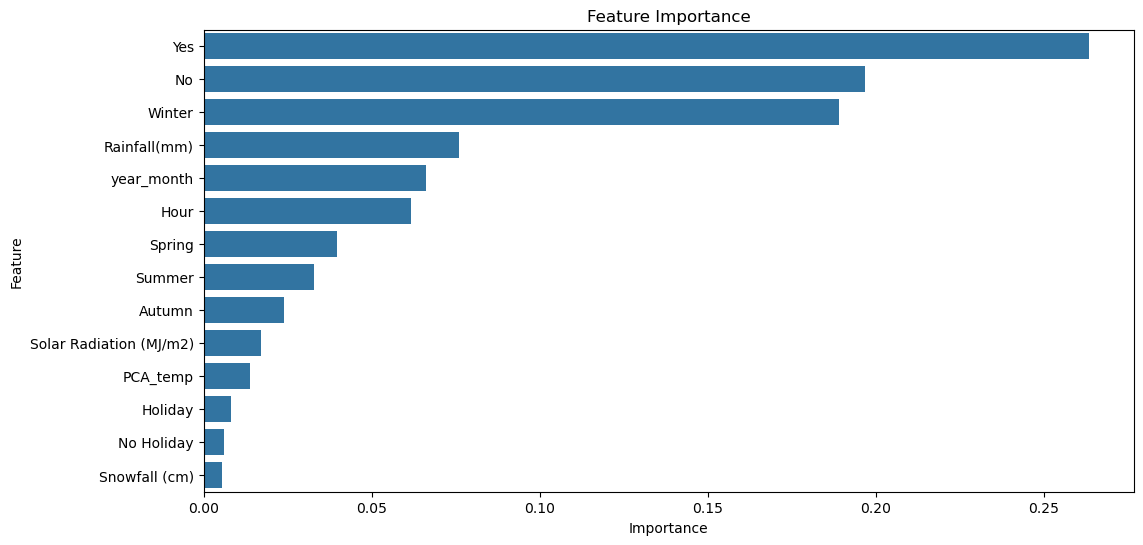

In [1891]:
# Feature importance
importance = best_xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**From above chart can see yes column is important factor for model performance whcih means people are using bikes on working day highest for their professional/work use more**
**then No means non working day  is more important factor to rent bike**
**The natural climatic parameters are not more important**

In [1892]:
#check of training values
training_df

,Model,r2score,mean squared,Rmse,Comments
0,linear regression - Before hyperparameter tuning,0.66,52.83,7.27,r2 score well performed
1,linear regression - after hyperparameter tuning,0.66,52.83,7.27,r2 score well performed
2,polynomial regression,0.85,23.80,4.88,r2 score best performed
3,Random regression without hyperparameter,0.98,3.00,1.73,r2 score overfitting
4,Random regression with hyperparameter,0.85,23.25,4.82,r2 score best performed
5,xg boost without hyperparameter,0.95,7.80,2.79,r2 score good performed
6,xg boost with hyperparameter,0.89,16.43,4.05,r2 score best performed
7,xg boost with hyperparameter,0.90,15.51,3.94,r2 score best performed
8,xg boost with hyperparameter,0.92,12.92,3.59,r2 score best performed
9,xg boost with hyperparameter,0.90,15.51,3.94,r2 score best performed


In [1893]:
# checl of test values
test_df

,Model,r2score,mean squared,Rmse,Comments
0,linear regression - Before hyperparameter tuning,0.65,52.72,7.26,r2 score well performed
1,linear regression - after hyperparameter tuning,0.65,52.72,7.26,r2 score well performed
2,Polynomial regression,0.84,24.48,4.95,r2 best performed
3,random regression without hyperparameter,0.86,21.13,4.60,r2 score overfitting
4,random regression with hyperparameter,0.85,22.64,4.76,r2 score best performed
5,xg boost without hyperparameter,0.87,19.86,4.46,r2 score good performed
6,xg boost with hyperparameter,0.87,19.09,4.37,r2 score best performed
7,xg boost with hyperparameter,0.88,18.53,4.30,r2 score best performed
8,xg boost with hyperparameter,0.88,18.01,4.24,r2 score best performed
9,xg boost with hyperparameter,0.88,18.53,4.30,r2 score best performed


**Xg boost model with hyperparameter is best with r2 score 90 and 88 percentage and rmse value 3.94 and 4.30**

# Conclusion

### Throughout the analysis we went through various steps to determine our predictions for the no of bikes will rent on particular date. We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications,remove decent amount of skewness.
--------------------------------------------------------------------------------
### Finally we implemented 4 machine learning algorithms namely;Linear regression,Polynomial Regression,Random regression ,  and XGBoost Regression  and also with randomized search cv for hyperparameter tuning to reduce overfitting and increase model performance. The best performance was given by our XG boost regression with hyperparameter tunning  model.Around 90% on traning and for testing 88% of r2score matrix and root mean squared error also shows 3.94 on traning and 4.30 on test which means model has less error which significant.Random regression is also performed best like xgboost just like r2 score got on traning 85% and testing 85% and rmse error got on tranining 4.82 and test 4.76.
-------------------------------------------------------------------------------
### The r2 score of our best model was 90% and 88% for training and test set respectively in xg boost tree  after hypertunning model . Although, the difference is still 2%.Feature importance gave of xgboost model was YES  columns means  working day and no means not working day and winter season column and not for natural affecting columns of wheather conditions like solar radiation, wind speed , temprature.performnace can be still better with approach of handelling skewness more effectively  and applying still better hyperarameters for best results and feature engineering applications.